In [1]:
df<-read.csv('d:/data/rides/rides2.csv')
head(df)

weekend,num.child,distance,rides,games,wait,clean,overall,class
1,0,114.64826,87,73,60,89,47,0
1,2,27.01410,87,78,76,87,65,1
0,1,63.30098,85,80,70,88,61,1
1,0,25.90993,88,72,66,89,37,0
0,4,54.71831,84,87,74,87,68,1
0,5,22.67934,81,79,48,79,27,0


In [2]:
dim(df)
summary(df)

[1] 500   9

    weekend        num.child        distance            rides       
 Min.   :0.000   Min.   :0.000   Min.   :  0.5267   Min.   : 72.00  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.: 10.3181   1st Qu.: 82.00  
 Median :0.000   Median :2.000   Median : 19.0191   Median : 86.00  
 Mean   :0.482   Mean   :1.738   Mean   : 31.0475   Mean   : 85.85  
 3rd Qu.:1.000   3rd Qu.:3.000   3rd Qu.: 39.5821   3rd Qu.: 90.00  
 Max.   :1.000   Max.   :5.000   Max.   :239.1921   Max.   :100.00  
     games             wait           clean          overall      
 Min.   : 57.00   Min.   : 40.0   Min.   : 74.0   Min.   :  6.00  
 1st Qu.: 73.00   1st Qu.: 62.0   1st Qu.: 84.0   1st Qu.: 40.00  
 Median : 78.00   Median : 70.0   Median : 88.0   Median : 50.00  
 Mean   : 78.67   Mean   : 69.9   Mean   : 87.9   Mean   : 51.26  
 3rd Qu.: 85.00   3rd Qu.: 77.0   3rd Qu.: 91.0   3rd Qu.: 62.00  
 Max.   :100.00   Max.   :100.0   Max.   :100.0   Max.   :100.00  
     class      
 Min.   :0.000  
 1st Qu.:0.000

In [3]:
library(dplyr)
df<-df %>% select(-overall)
dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 500   8

weekend,num.child,distance,rides,games,wait,clean,class
1,0,114.64826,87,73,60,89,0
1,2,27.01410,87,78,76,87,1
0,1,63.30098,85,80,70,88,1
1,0,25.90993,88,72,66,89,0
0,4,54.71831,84,87,74,87,1
0,5,22.67934,81,79,48,79,0



  0   1 
262 238 

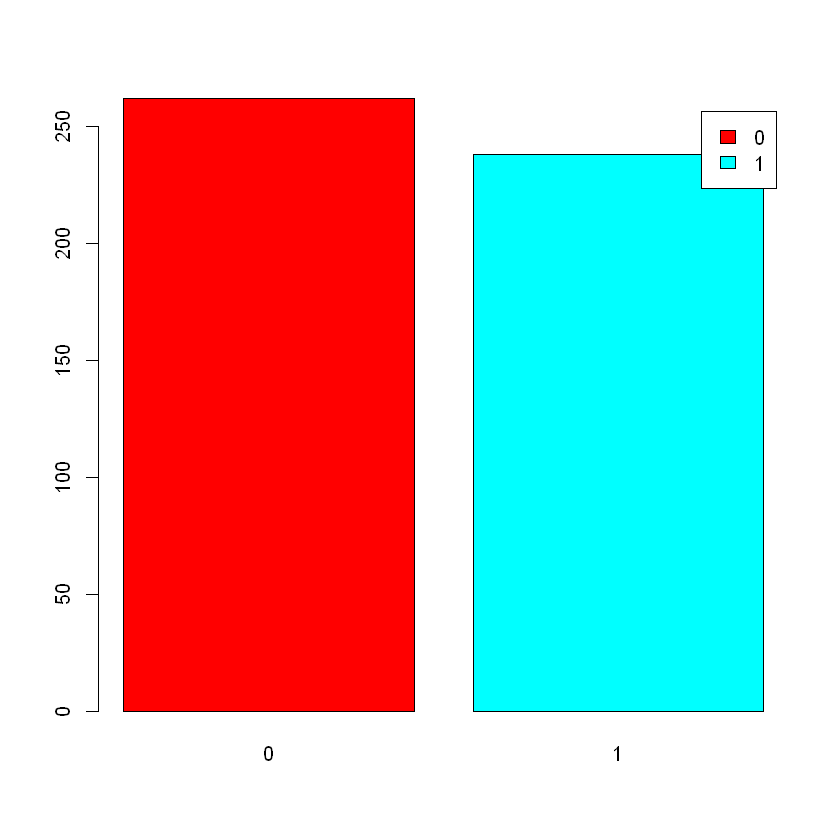

In [4]:
(tbl<-table(df$class))
barplot(tbl,beside=T, legend=T, col=rainbow(2))
# 0평균만족도 점수 평균미만 262, 평균이상 238

In [5]:
library(ROSE)
df_samp<-ovun.sample(class ~ . , data=df, seed=1, method='under',
                    N=238*2)$data
(tbl<-table(df_samp$class))

Warning message:
"package 'ROSE' was built under R version 3.6.2"Loaded ROSE 0.0-3




  0   1 
238 238 

In [7]:
library(caret)
set.seed(123)
idx_train<-createDataPartition(y=df_samp$class, p=0.8, list=F)
train<-df_samp[idx_train,] #학습용
X_train<-train[,-8]
y_train<-train[,8]
test<-df_samp[-idx_train,] #검증용
X_test<-test[,-8]
y_test<-test[,8]

Warning message:
"package 'reshape' was built under R version 3.6.2"
Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename

Using  as id variables


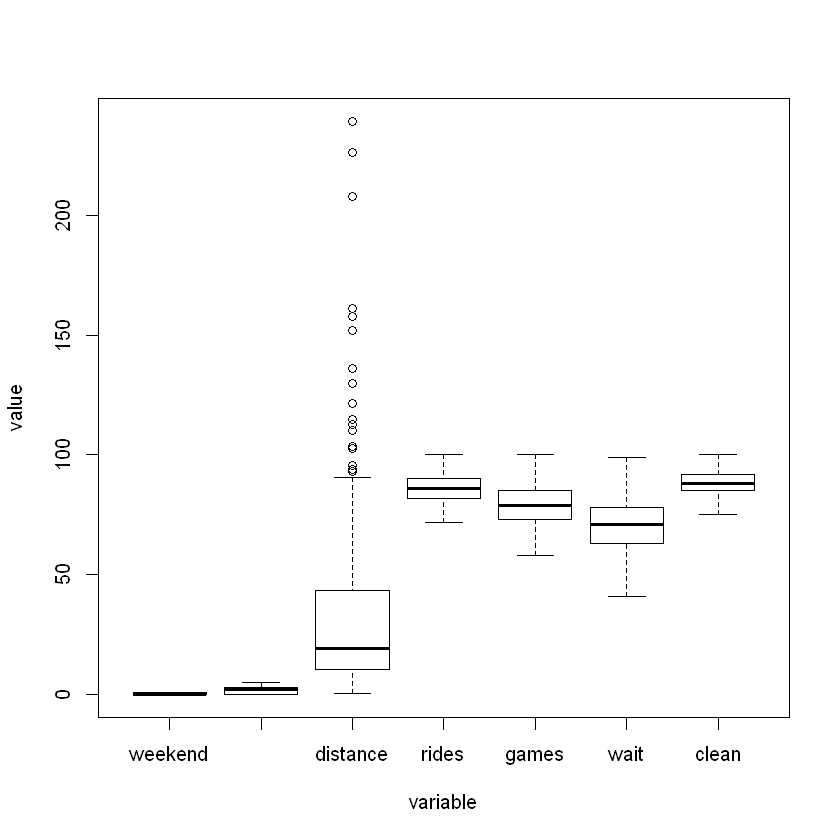

In [20]:
library(reshape)
#박스플롯(정규화 전)
meltData<-melt(X_train)
boxplot(data=meltData,value~variable)

In [21]:
head(X_train)
head(X_test)

,weekend,num.child,distance,rides,games,wait,clean
1,0,5,11.583172,90,80,67,88
4,1,2,9.911894,86,68,58,82
5,1,2,3.213038,82,69,60,79
6,0,1,52.916100,82,78,74,81
7,1,2,121.614584,76,62,64,81
8,1,0,31.802904,84,68,76,85


,weekend,num.child,distance,rides,games,wait,clean
2,1,2,79.24873,82,72,68,81
3,1,4,103.12012,87,77,57,85
12,0,0,44.54439,91,85,76,93
15,0,0,66.99375,93,83,71,88
19,1,0,27.85703,93,89,100,94
28,0,2,91.16716,79,75,64,84


In [22]:
#scale 정규화 함수, 평균과 
X_train_scaled<-as.data.frame(scale(X_train))
X_test_scaled<-as.data.frame(scale(X_test))
#X데이터와 y데이터 결합
train_scaled<-cbind(X_train_scaled,class=y_train)
test_scaled<-cbind(X_test_scaled,class=y_test)

Using  as id variables


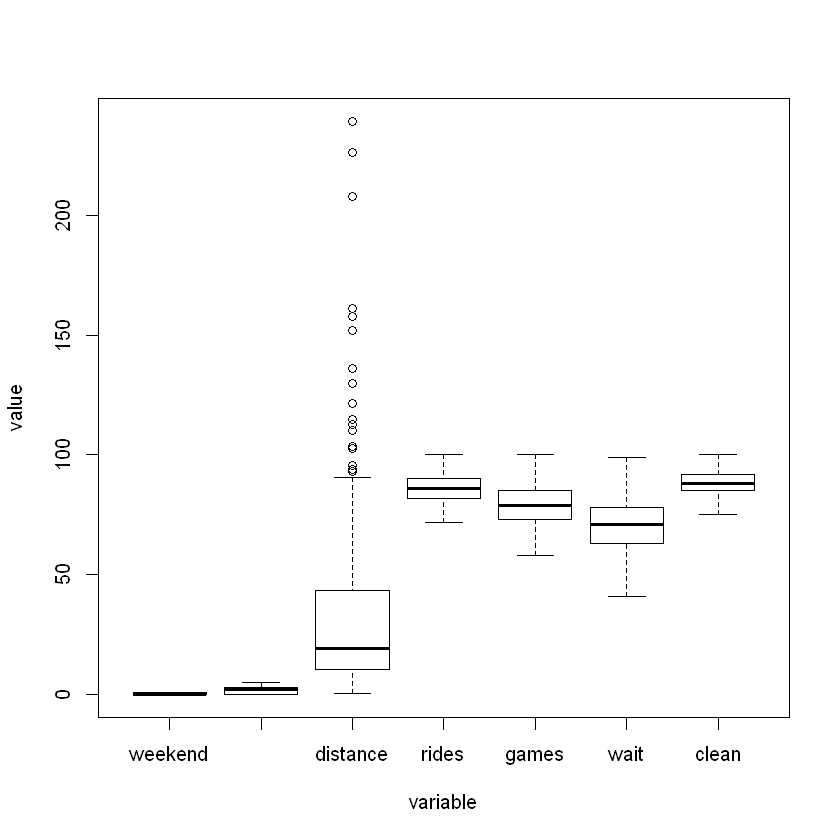

In [24]:
#박스플롯(정규화후)
meltData<-melt(X_train)
boxplot(data=meltData,value~variable)


In [25]:
library(party)
model<-ctree(class ~ . , data=train_scaled) #의사결정나무 모형

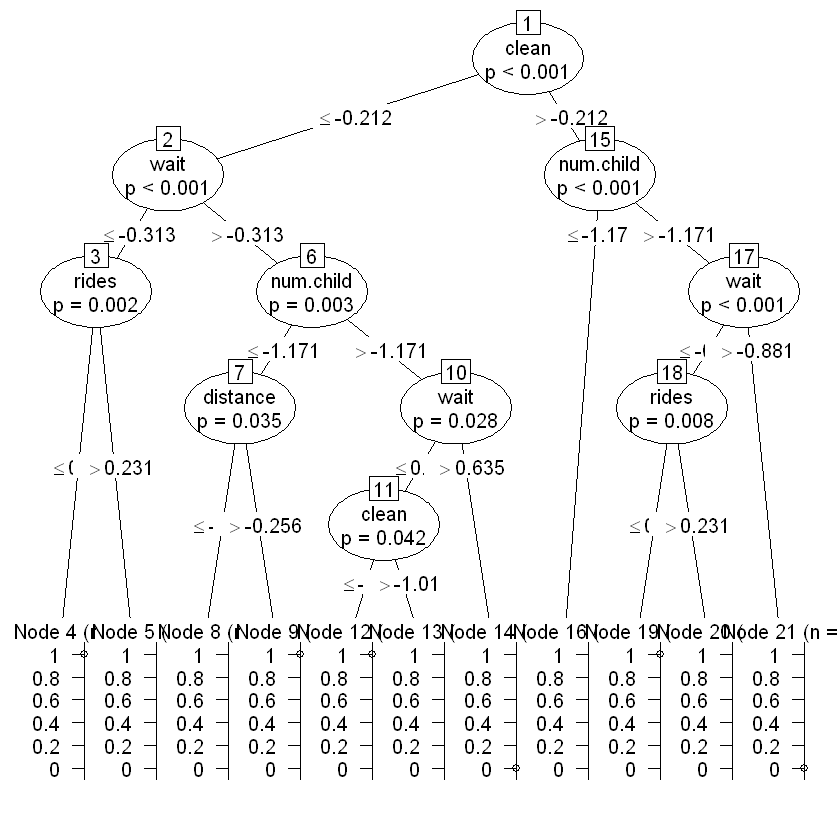

In [26]:
plot(model)

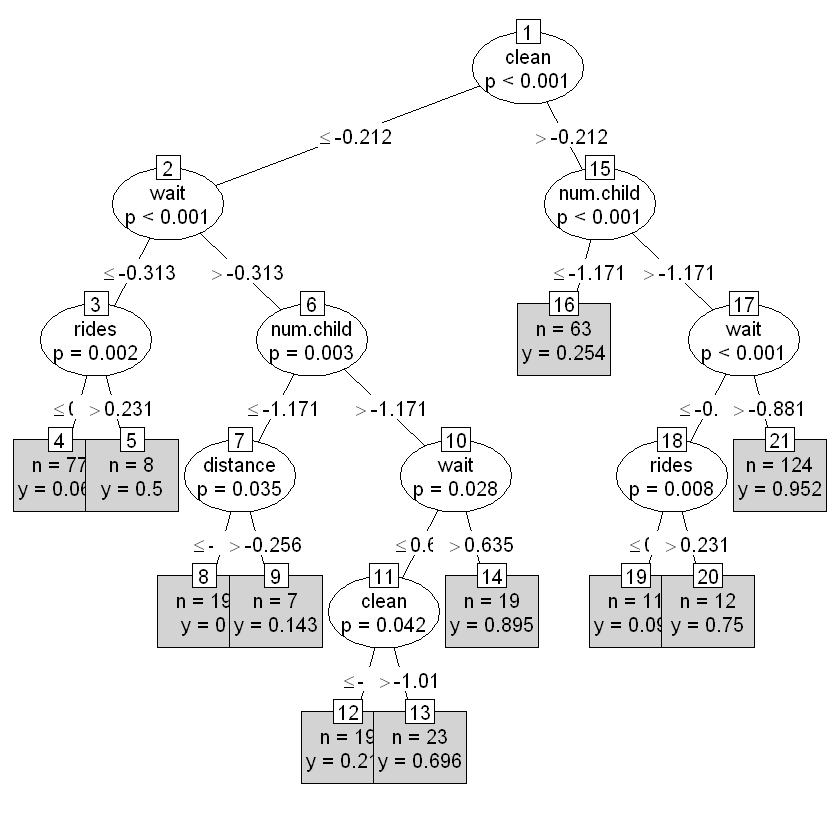

In [27]:
plot(model,type='simple')

In [28]:
#학습용 데이터셋의 예측 정확도
pred<-predict(model,newdata=X_train_scaled,type='response')
result<-round(pred) #반올림
mean(y_train == result) #87.1% 스케일 후 87.1
table(y_train,result)

[1] 0.8717277

       result
y_train   0   1
      0 173  18
      1  31 160

In [29]:
#검증용 데이터셋의 정확도
pred<-predict(model,newdata=X_test_scaled,type='response')
result<-round(pred)
mean(y_test == result) #78.7%(과적합) 스케일 후  77.6
table(y_test,result) 

[1] 0.7765957

      result
y_test  0  1
     0 37 10
     1 11 36

In [30]:
library(randomForest)
set.seed(1)
#랜덤포레스트 모형 (트리갯수 100)
model<-randomForest(class ~ . , data=train_scaled,
                   mtry=floor(sqrt(ncol(train))),ntree=100,
                   importance=T)
model

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


Call:
 randomForest(formula = class ~ ., data = train_scaled, mtry = floor(sqrt(ncol(train))),      ntree = 100, importance = T) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 2

          Mean of squared residuals: 0.1241023
                    % Var explained: 50.36

In [31]:
#학습용 데이터셋의 예측 정확도
pred<-predict(model,newdata=X_train_scaled,type='response')
result<-round(pred) #반올림
mean(y_train == result) #98.6% 스케일후 99.2
table(y_train,result)

[1] 0.9921466

       result
y_train   0   1
      0 189   2
      1   1 190

In [32]:
#검증용 데이터셋의 정확도
pred<-predict(model,newdata=X_test_scaled,type='response')
result<-round(pred)
mean(y_test == result) #79.7% 스케일 후 77.6
table(y_test,result) 

[1] 0.7765957

      result
y_test  0  1
     0 38  9
     1 12 35

In [33]:
importance(model)

,%IncMSE,IncNodePurity
weekend,-0.6262784,1.258781
num.child,23.8901645,20.434856
distance,0.2193242,8.728671
rides,10.7761217,14.169941
games,2.8080846,10.761549
wait,14.4061500,16.744366
clean,11.7359574,14.739824


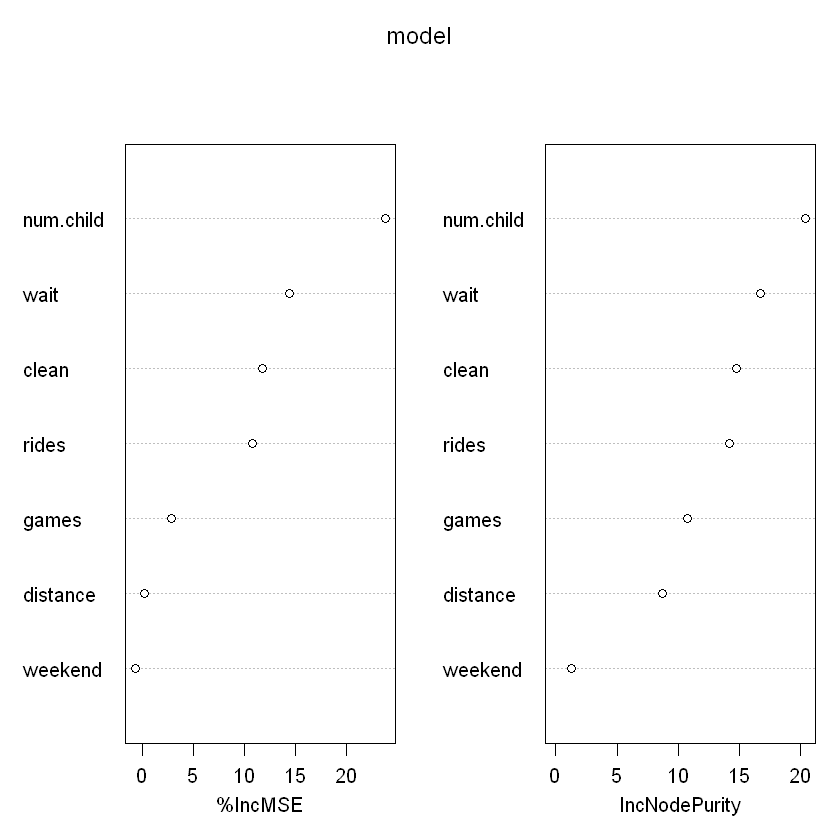

In [34]:
varImpPlot(model)